In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data
data = pd.read_csv('BankCustomerChurnPrediction.csv')


In [5]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### This dataset is for ABC Multistate bank with following columns:

1) customer_id, unused variable.
2) credit_score, used as input.
3) country, used as input.
4) gender, used as input.
5) age, used as input.
6) tenure, used as input.
7) balance, used as input.
8) products_number, used as input.
9) credit_card, used as input.
10) active_member, used as input.
11) estimated_salary, used as input.
12) churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
#### ** Aim is to Predict the Customer Churn for ABC Bank. **

In [38]:
# as if churn is 1 -> then client is left the bank
# if churn is 0 -> then client is not left the bank then it is classification problem so we apply logistic regression.

<Axes: >

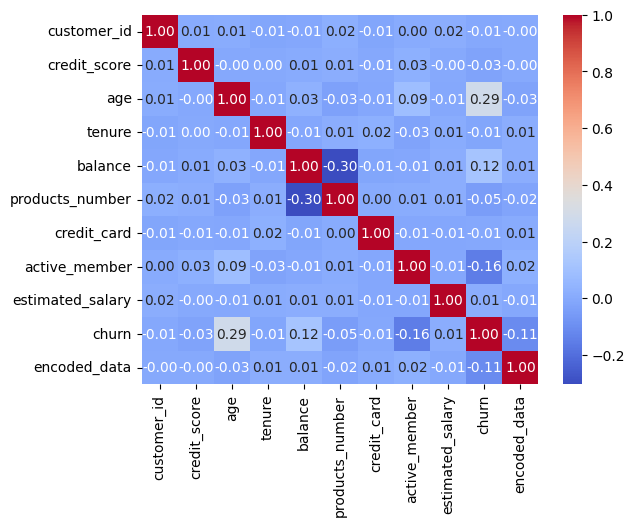

In [39]:
# helps to find the correlation with every column
cors = data.select_dtypes(include='number').corr()
# drawing heat map
sns.heatmap(cors, annot=True, cmap='coolwarm', fmt='.2f')


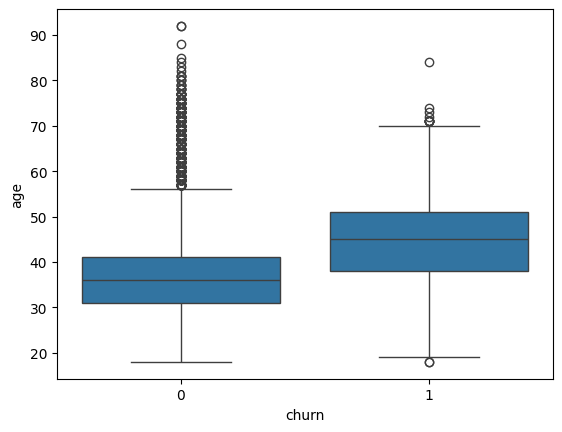

In [40]:
#  as we see from heat map 'age' and 'churn are more corelated'
# using box plot 

sns.boxplot(x='churn', y='age', data=data);
plt.show()

In [41]:
# so from the boxplot we see age badhne ke sath churning badh gayi hai 

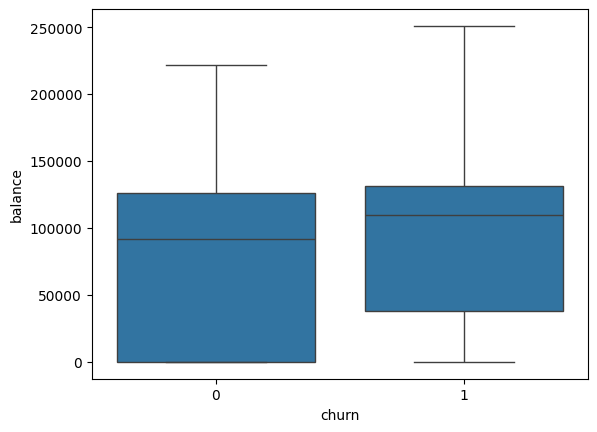

In [42]:
sns.boxplot(x='churn', y='balance', data=data);
plt.show()

In [43]:
# so from this boxplot  customer with higher balance have slightly higher chances to left

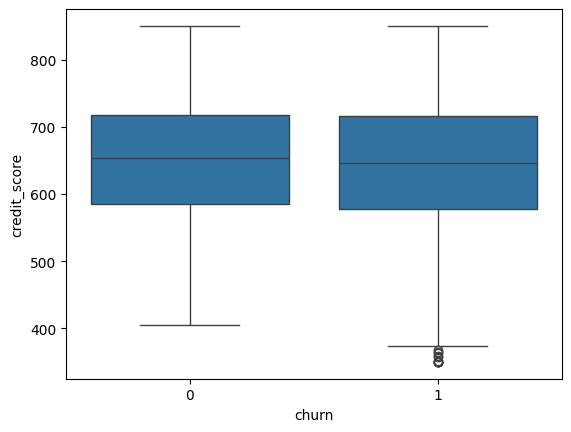

In [44]:
sns.boxplot(x='churn', y='credit_score', data = data);
plt.show()

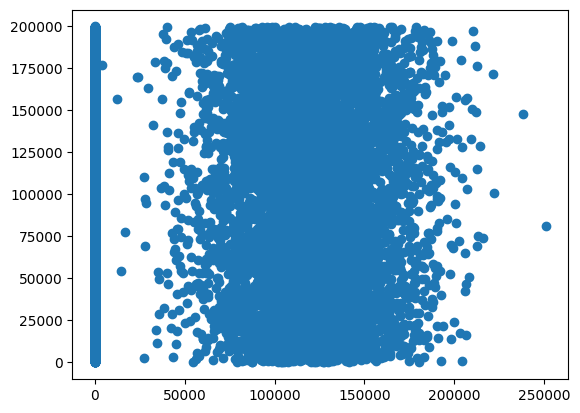

In [45]:
# check karte hn ki balance or estimated_Salary mn koi relation -> no realtion from graph
plt.scatter(data['balance'], data['estimated_salary']);

In [123]:
cnt = data['country'].value_counts();
print(cnt);

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [125]:
dummies = pd.get_dummies(data['country'])
print(dummies);

      France  Germany  Spain
0       True    False  False
1      False    False   True
2       True    False  False
3       True    False  False
4      False    False   True
...      ...      ...    ...
9995    True    False  False
9996    True    False  False
9997    True    False  False
9998   False     True  False
9999    True    False  False

[10000 rows x 3 columns]


In [46]:
cnt = data['gender'].value_counts();
print(cnt);

gender
Male      5457
Female    4543
Name: count, dtype: int64


In [47]:
# apply one-hot coding on genders
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['encoded_data'] = encoder.fit_transform(data['gender'])
data[['churn', 'encoded_data']].head()

,churn,encoded_data
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [48]:
cnt = data['encoded_data'].value_counts();
print(cnt);

encoded_data
1    5457
0    4543
Name: count, dtype: int64


In [49]:
m_churn = 0; f_churn = 0;
for i in range(0, len(data)):
    if(data['encoded_data'][i] == 1 and data['churn'][i] == 1):
        m_churn += 1
    elif(data['encoded_data'][i] == 0 and data['churn'][i] == 1):
        f_churn += 1

print("No. of Male Churn(or left): ", m_churn); 
print("No. of female Churn(or left): ", f_churn); 

No. of Male Churn(or left):  898
No. of female Churn(or left):  1139


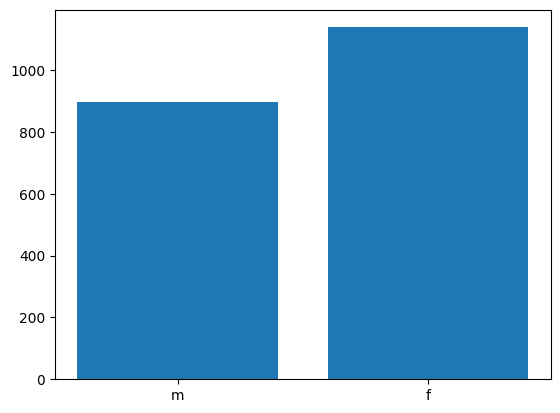

In [50]:
plt.bar(['m', 'f'], [m_churn, f_churn]);

In [126]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,encoded_data
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [127]:
# merged dummies country data
data = pd.concat([data, dummies], axis = 'columns');
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,encoded_data,France,Germany,Spain
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,True,False,False
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,False,False,True
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,True,False,False
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,True,False,False
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,False,False,True


In [128]:
# x_values = data[['age', 'credit_score', 'encoded_data', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary',]]
# y_values = [['churn']]

x_values = data.drop(['churn', 'country', 'gender'], axis = 1);
y_values = data["churn"];

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.2);

In [138]:
# standardistion
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit(X_train); 

In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T 

LogisticRegression()

In [141]:
# score tells "how much correct from total prediction"
scre = model.score(X_test, y_test)
print("score is how much correct from total prediction: ", scre);

score is how much correct from total prediction:  0.7885


/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [142]:
# model coefficient tells kis column pe jayada weight aaya matlab kon jayada depends kar raha tha 
model.coef_

array([[-7.66925393e-08, -1.22379981e-03,  4.59489315e-03,
        -6.77927216e-05,  2.93702399e-06, -7.41520442e-06,
        -2.02493989e-07, -1.22404450e-04,  1.21482751e-06,
        -8.50439430e-05, -6.69329110e-05,  8.96029540e-05,
        -2.26365949e-05]])

/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T 

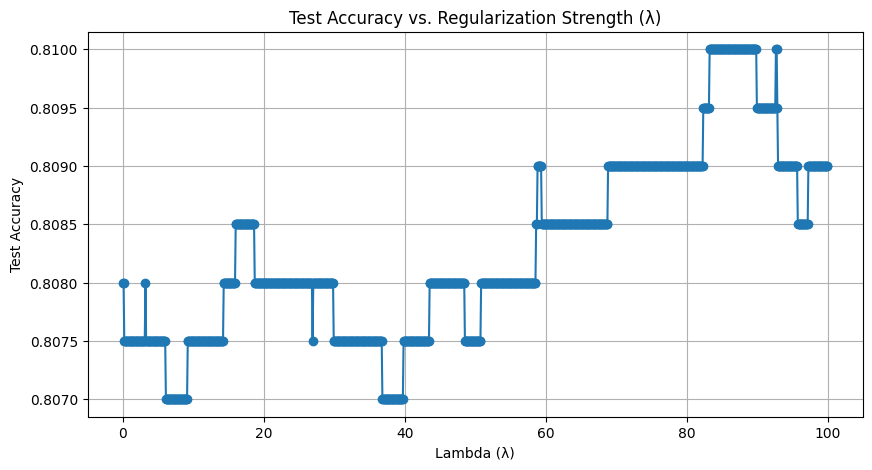

In [143]:
# evaluating hyper parameter to finding the best lambda where error is very very minimum
from sklearn.pipeline import make_pipeline
lambdas = np.arange(0.01, 100, 0.1)
test_score = []

for lam in lambdas:
    pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 1/lam, solver='lbfgs', max_iter=1000))
    pipe.fit(X_train, y_train)
    test_score.append(pipe.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(lambdas, test_score, marker='o')
plt.xlabel("Lambda (λ)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Regularization Strength (λ)")
plt.grid(True)
plt.show()

In [144]:
best_idx = np.argmax(test_score)
print("Best λ:", lambdas[best_idx], "→ Accuracy:", test_score[best_idx])


Best λ: 83.21000000000001 → Accuracy: 0.81


In [110]:
# so actually what happen lambda increases which lead to model become too simple and
#  result is UNDERFITTING
# it can't learn enough from training data
# So both train and test performance degrade

/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T 

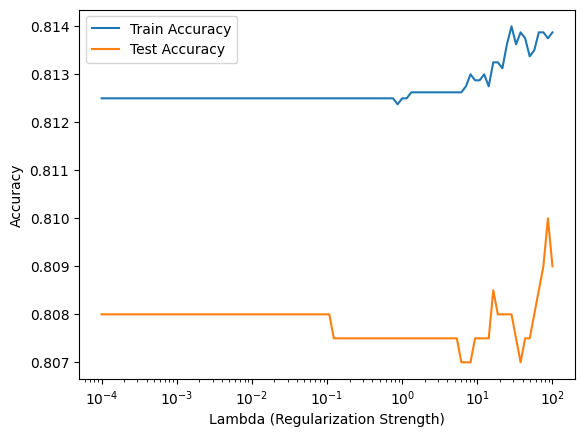

✅ Best Lambda (λ): 9.81
🎯 Corresponding Test Accuracy: 0.81


/var/folders/7b/kspr61f97ml3z9kllvl2gf5r0000gn/T/ipykernel_7249/2961043427.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


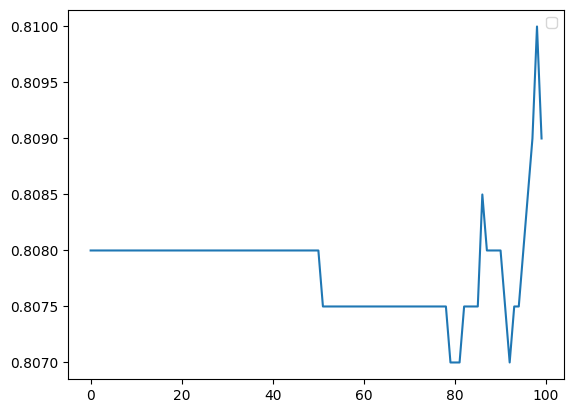

In [154]:
from sklearn.pipeline import make_pipeline
train_score = []
test_score = []

for lam in np.logspace(-4, 2, 100):
    pipe = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam))
    pipe.fit(X_train, y_train)
    train_score.append(pipe.score(X_train, y_train))
    test_score.append(pipe.score(X_test, y_test))

plt.plot(np.logspace(-4, 2, 100), train_score, label='Train Accuracy')
plt.plot(np.logspace(-4, 2, 100), test_score, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


best_index = np.argmax(test_score)       # max test accuracy ka index
best_lambda = lambdas[best_index]        # us index par lambda
best_accuracy = test_score[best_index]   # us index par accuracy

print("✅ Best Lambda (λ):", best_lambda)
print("🎯 Corresponding Test Accuracy:", best_accuracy)
plt.plot(test_score)
plt.legend()

In [155]:
print(np.argmax(test_score));

98


In [157]:
# making model now by using best_lambda 
best_lambda = 9.81
final_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=1/best_lambda, max_iter=1000)
)

# Train on full training data
final_model.fit(X_train, y_train)

# Evaluate on test data (optional)
test_acc = final_model.score(X_test, y_test)
print("✅ Final Test Accuracy:", test_acc)


✅ Final Test Accuracy: 0.8075


/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/anubhavpathak/Desktop/anubhavWorkSpace/jBooks/Machine-Learning-/MiniProjects/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T 

In [158]:
X_train.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'encoded_data', 'France', 'Germany', 'Spain'],
      dtype='object')

In [159]:
model.coef_

array([[-7.66925393e-08, -1.22379981e-03,  4.59489315e-03,
        -6.77927216e-05,  2.93702399e-06, -7.41520442e-06,
        -2.02493989e-07, -1.22404450e-04,  1.21482751e-06,
        -8.50439430e-05, -6.69329110e-05,  8.96029540e-05,
        -2.26365949e-05]])

In [160]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,encoded_data,France,Germany,Spain
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,True,False,False
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,False,False,True
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,True,False,False
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,True,False,False
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,False,False,True


#### Q-1 Do older people churn more

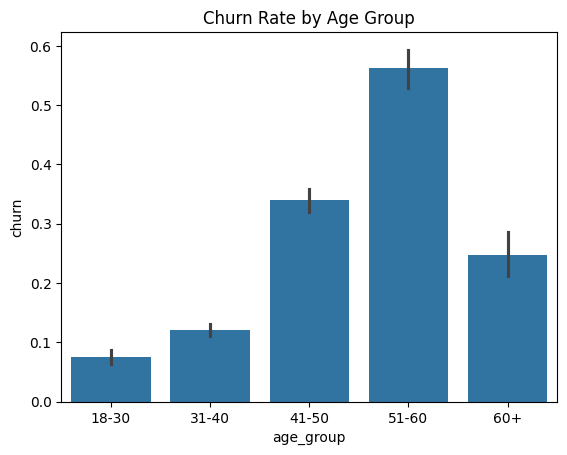

In [161]:
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
sns.barplot(data=data, x='age_group', y='churn')
plt.title("Churn Rate by Age Group")
plt.show()

#### Q-2 Is German people churn more?

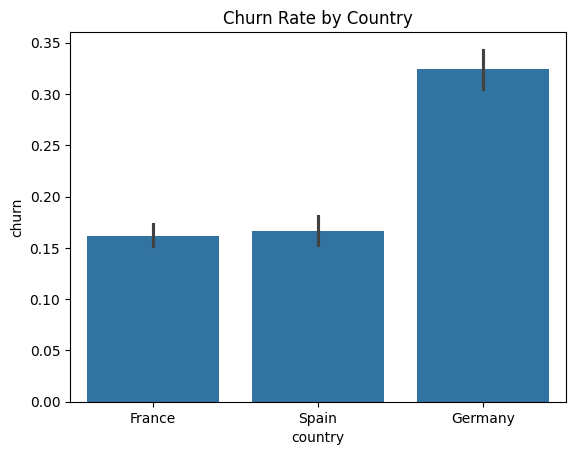

In [162]:
sns.barplot(data=data, x='country', y='churn')
plt.title("Churn Rate by Country")
plt.show()

### prediction with new customer?

In [164]:
new_customer = pd.DataFrame([{
    'customer_id' :99999,
    'credit_score': 620,
    'age': 45,
    'tenure': 3,
    'balance': 120000,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 80000,
    'encoded_data': 1,         # 1 = Male if label encoded
    'France': 0,
    'Germany': 1,
    'Spain': 0
}])

# Predict
prediction = final_model.predict(new_customer)
prob = final_model.predict_proba(new_customer)[0][1]

print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")
print("Churn Probability:", round(prob * 100, 2), "%")


Churn Prediction: Yes
Churn Probability: 93.67 %
